In [1]:
import os, sys
import pdfplumber

import fitz  # PyMuPDF

import numpy as np

from PIL import Image
import io

from dotenv import load_dotenv
load_dotenv()

from openai import OpenAI

# Plotting
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
pdf_filepath = '/Users/weikai/Library/CloudStorage/Dropbox/paper/CCWu'
pdf_filename = 'CCWu 2021 Modified distributed Bragg reflector for protecting organic light-emitting diode displays against ultraviolet light.pdf'

In [3]:
with pdfplumber.open( os.path.join(pdf_filepath, pdf_filename) ) as pdf:
    text = ''
    for page in pdf.pages:
        text += page.extract_text()
    # text = pdf.pages[0].extract_text() + pdf.pages[1].extract_text() + pdf.pages[2].extract_text()
text

'ResearchArticle Vol.29,No.5/1March2021/OpticsExpress 7654\nModified distributed Bragg reflector for\nprotecting organic light-emitting diode displays\nagainst ultraviolet light\nKAI-CHEN LIN,1 WEI-KAI LEE,1 BO-KAI WANG,1 YU-HSING LIN,2\nHSIEN-HUNG CHEN,2 YI-HWA SONG,2 YU-HSIN HUANG,1 LI-WEI\nSHIH,2 AND CHUNG-CHIH WU1,*\n1GraduateInstituteofElectronicsEngineering,GraduateInstituteofPhotonicsandOptoelectronicsand\nDepartmentofElectricalEngineering,NationalTaiwanUniversity,Taipei106,Taiwan\n2AUOptronicsCorporation,Hsinchu300,Taiwan\n*wucc@ntu.edu.tw\nAbstract: Sunlight/UV (ultraviolet)-induced degradation is still a critical issue for outdoor\napplicationsoforganiclight-emittingdiode(OLED)displays. Therefore,effectiveUV-blocking\nstructures that can prevent OLED displays from sunlight/UV degradation and still keep the\nOLED panels’ display performance is necessary. In this report, modified distributed Bragg\nreflector (DBR) structures having UV-absorbing dielectric materials and adjusted

# Extract Context

In [4]:
# Replace with your OpenAI API key
openai = OpenAI(api_key=os.environ['OPENAI_API_KEY'])

# Send a message to ChatGPT
system_message = '''In the following section, I will give you the content extracted from an academic paper by pdfplumber. '''\
                 '''However, there are a lot of undesired header and tail from in the context. \n''' \
                 '''To be more meaningful content extraction, please help me to extract : \n''' \
                 '''(1) paper title \n'''\
                 '''(2) authors and their affiliations\n'''\
                 '''(3) abstract paragraph\n''' \
                 '''(4) introduction\n'''\
                 '''(5) the content of each sections \n '''\
                 '''(6) image caption \n '''\

def get_relations_from_LLM( content ):
    completion = openai.chat.completions.create(
        model="gpt-4o", # 'gpt-4', 'gpt-3.5-turbo', 'gpt-4o'
        messages=[
              {"role": "system", "content": system_message},
              {"role": "user", "content": content}
        ]
    )
    return completion.choices[0].message.content

In [5]:
reply = get_relations_from_LLM(text) 
print(reply)

### (1) Paper Title
Modified distributed Bragg reflector for protecting organic light-emitting diode displays against ultraviolet light

### (2) Authors and Their Affiliations
**Authors:**
- Kai-Chen Lin, Wei-Kai Lee, Bo-Kai Wang, Yu-Hsing Lin, Hsien-Hung Chen, Yi-Hwa Song, Yu-Hsin Huang, Li-Wei Shih, and Chung-Chih Wu

**Affiliations:**
- Graduate Institute of Electronics Engineering, Graduate Institute of Photonics and Optoelectronics and Department of Electrical Engineering, National Taiwan University, Taipei, Taiwan
- AU Optronics Corporation, Hsinchu, Taiwan

*Corresponding Author:* wucc@ntu.edu.tw

### (3) Abstract Paragraph
Sunlight/UV (ultraviolet)-induced degradation is still a critical issue for outdoor applications of organic light-emitting diode (OLED) displays. Therefore, effective UV-blocking structures that can prevent OLED displays from sunlight/UV degradation and still keep the OLED panels’ display performance is necessary. In this report, modified distributed Bragg re

# Extract Image

In [6]:
def extract_images_from_pdf(pdf_filepath, pdf_filename):
    doc = fitz.open( os.path.join(pdf_filepath, pdf_filename) )
    images = []  # 存儲提取的圖像

    for i in range(len(doc)):
        for img in doc.get_page_images(i):
            xref = img[0]
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]
            images.append(image_bytes)  # 將圖像數據添加到列表中
    return images
def display_images(images):
    for img_bytes in images:
        img = Image.open(io.BytesIO(img_bytes))
        display(img)  # 在 Jupyter Notebook 中顯示圖像

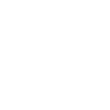

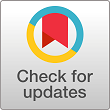

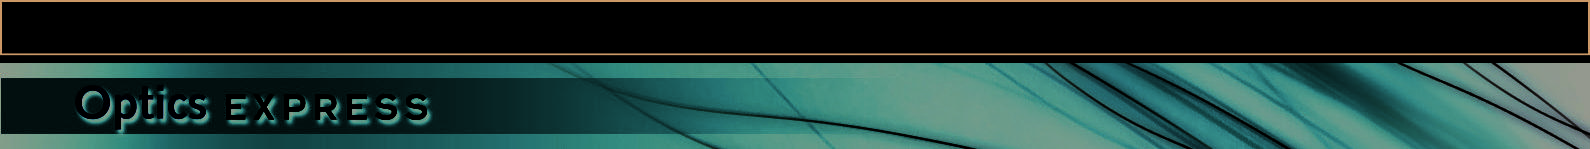

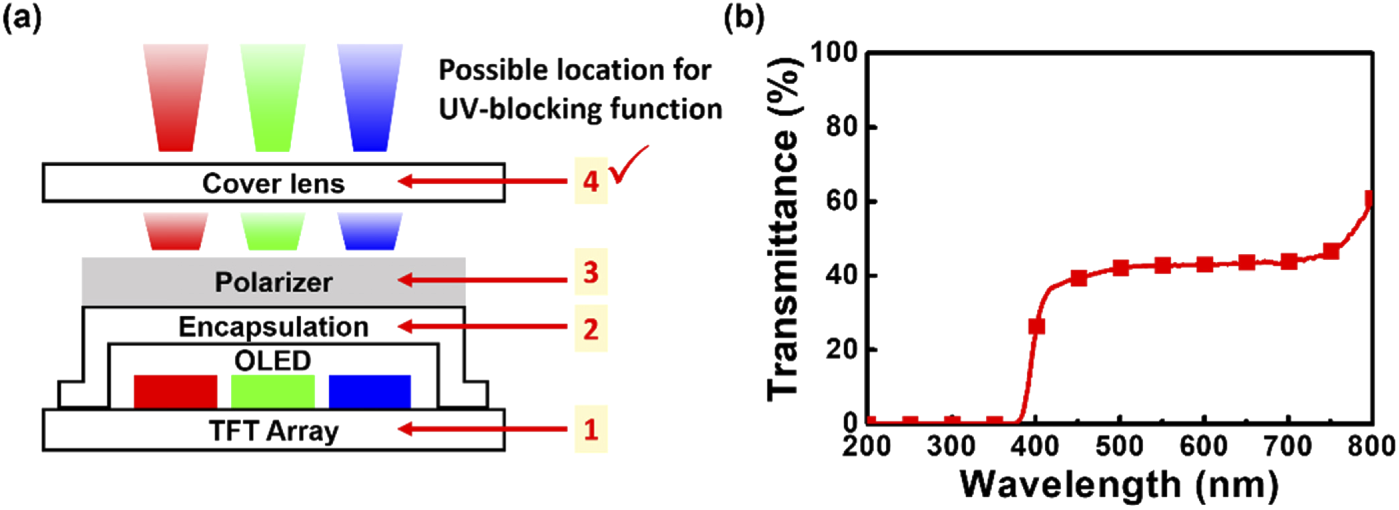

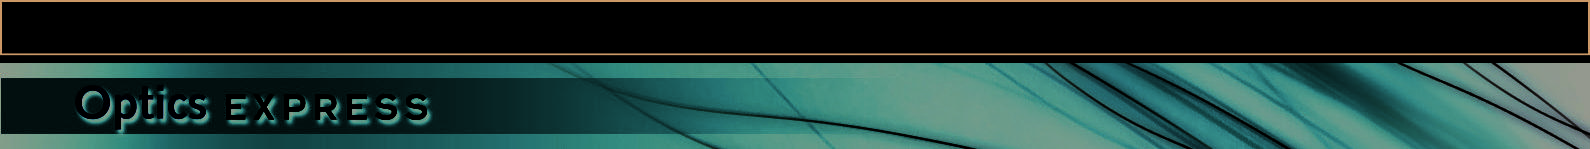

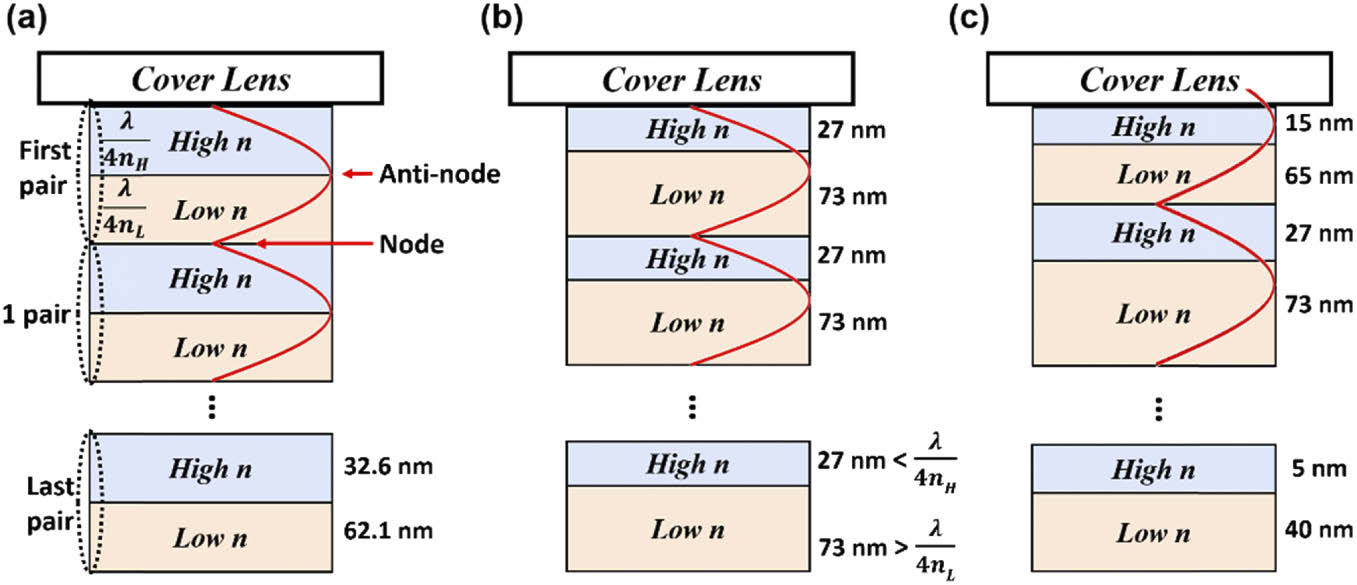

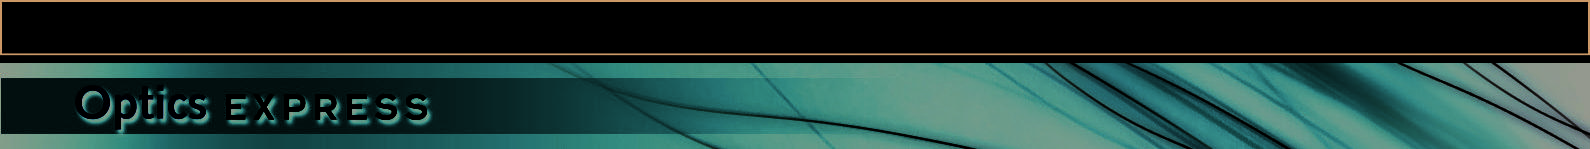

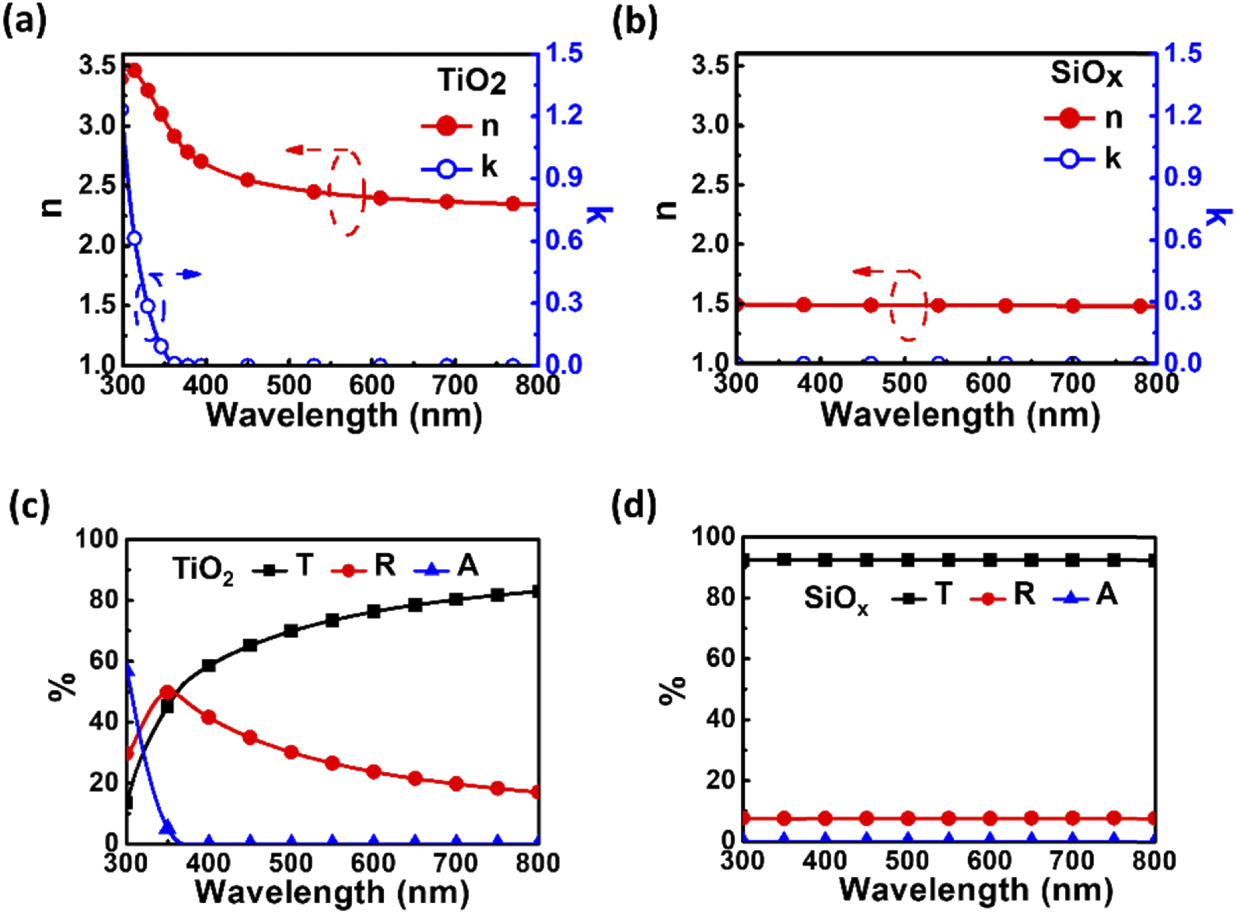

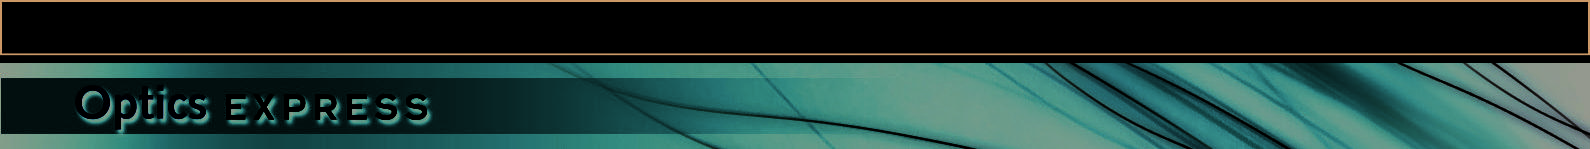

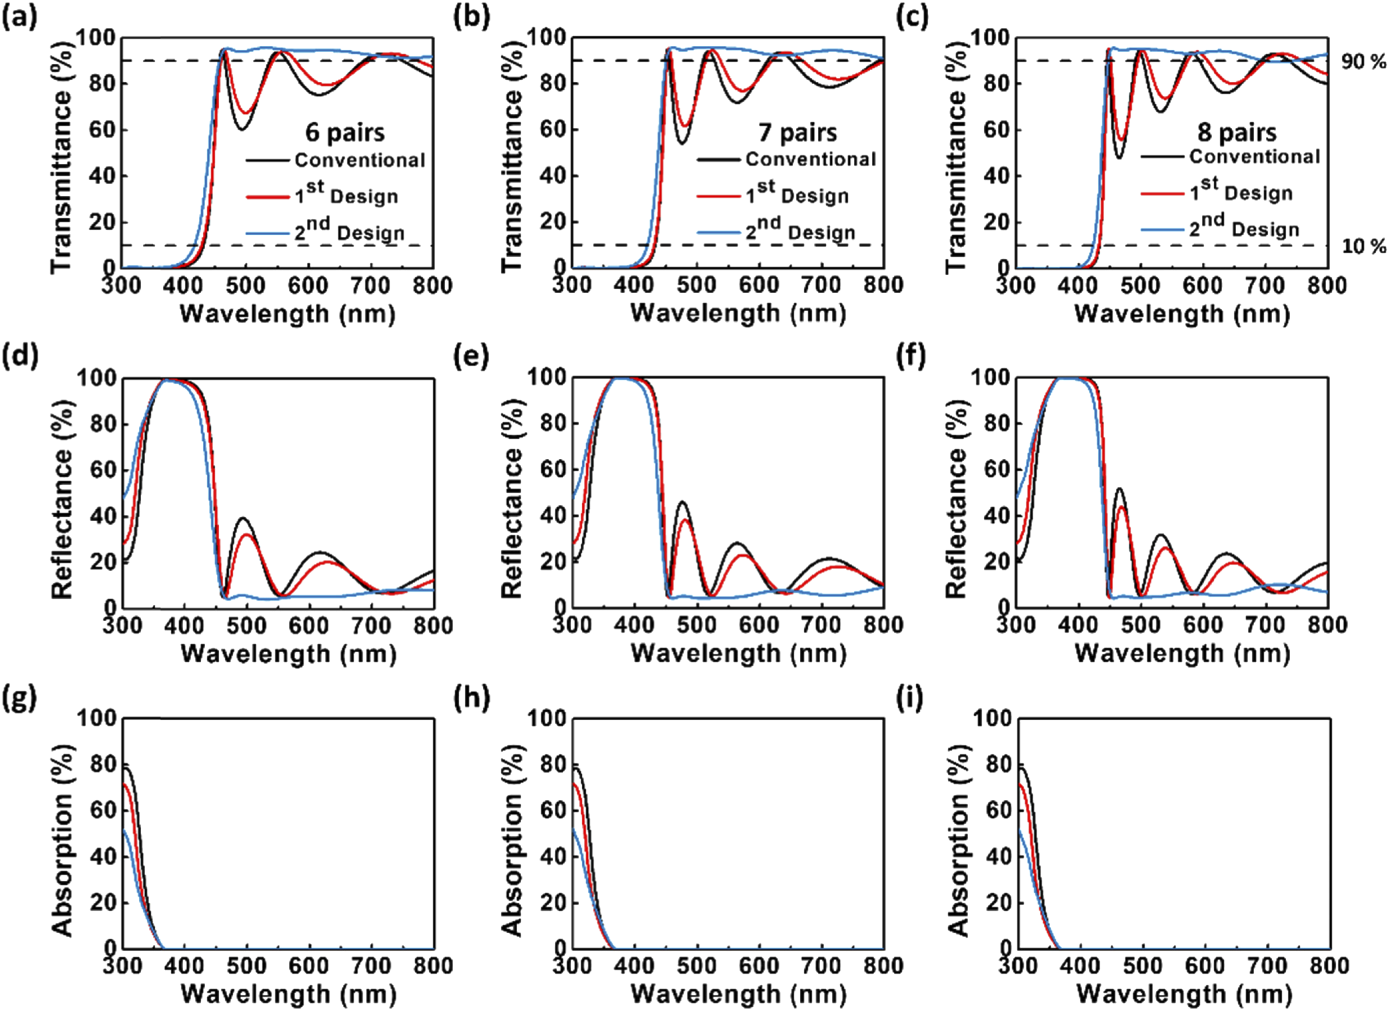

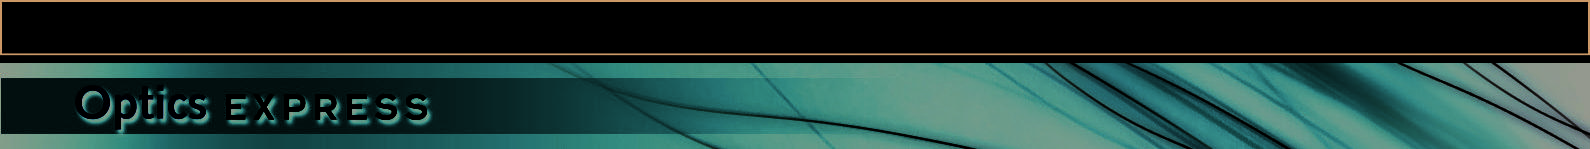

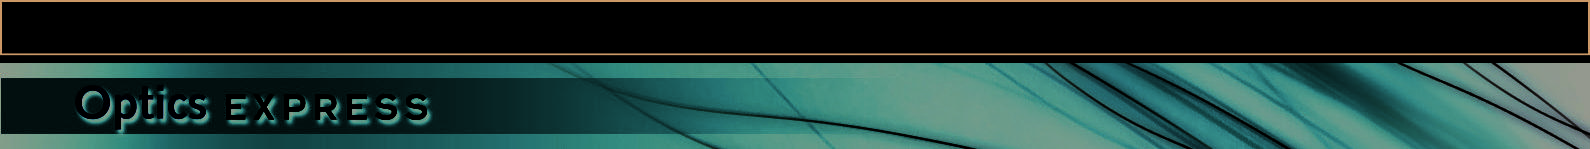

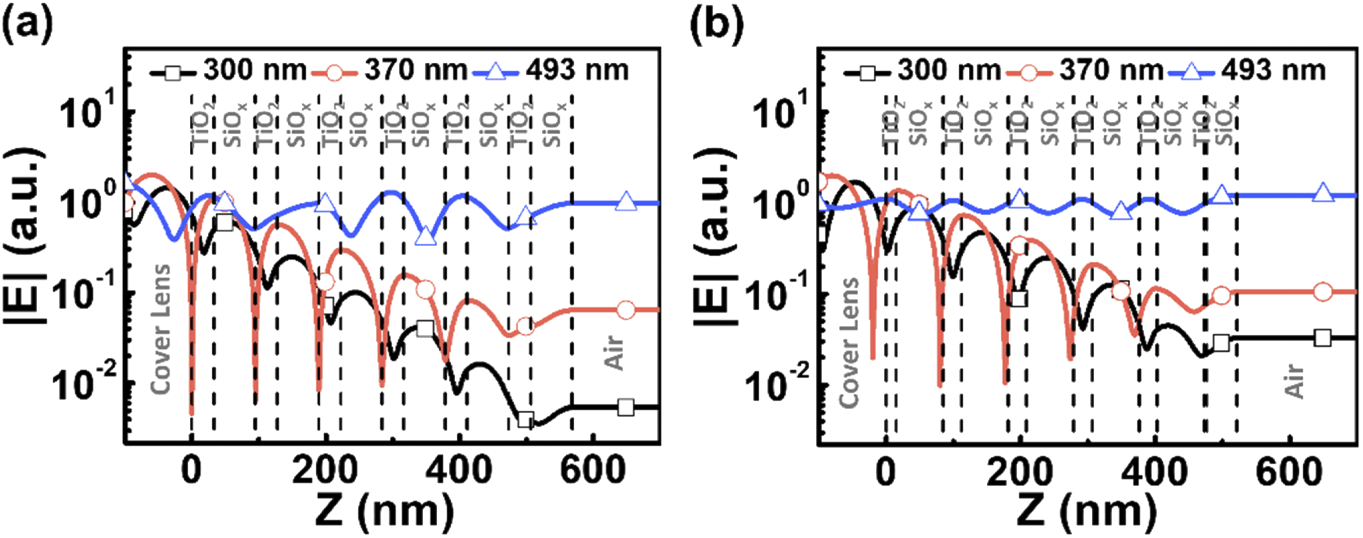

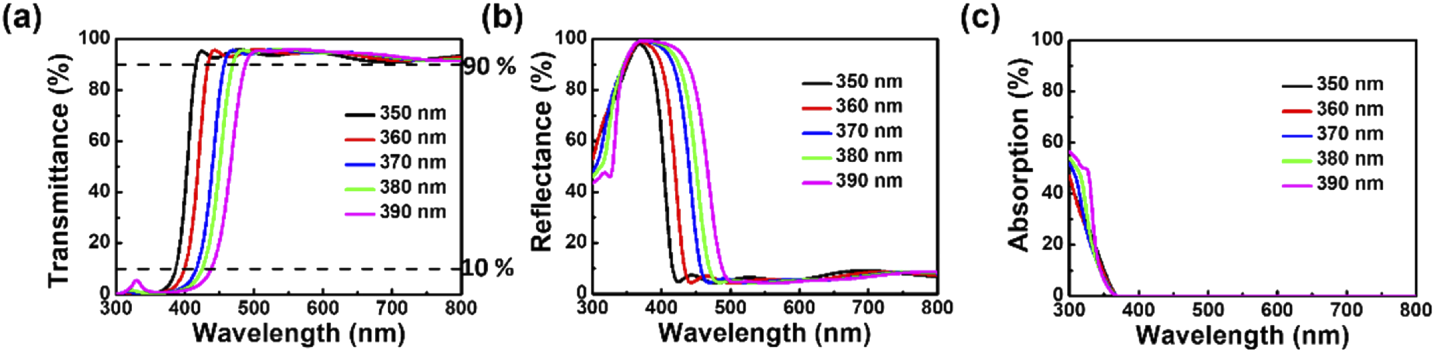

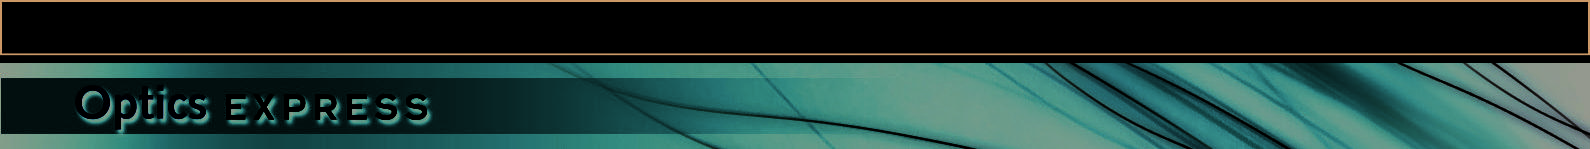

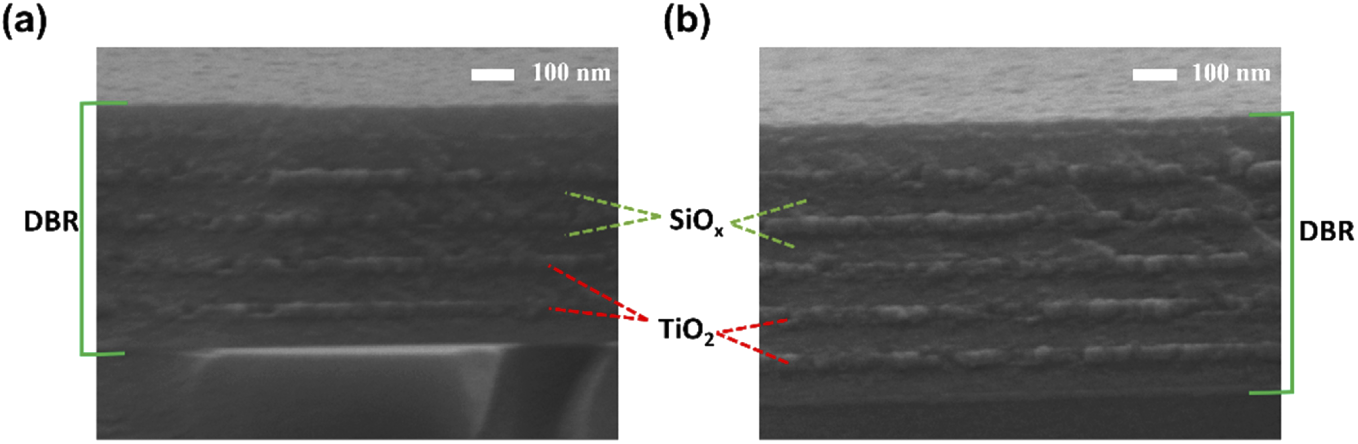

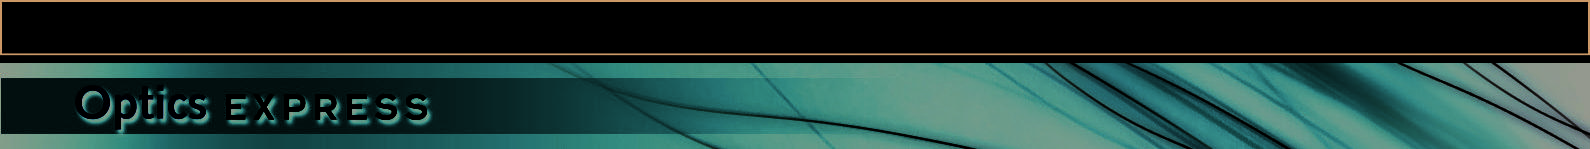

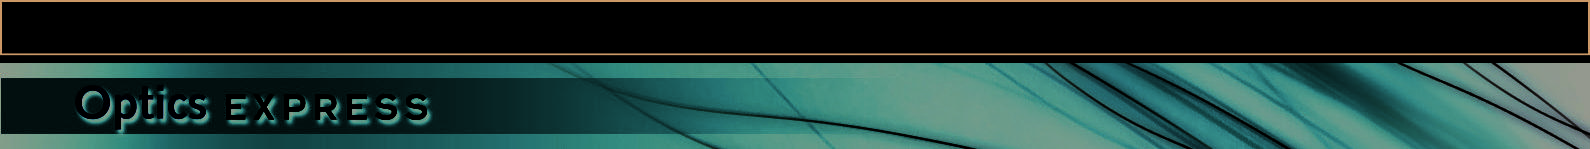

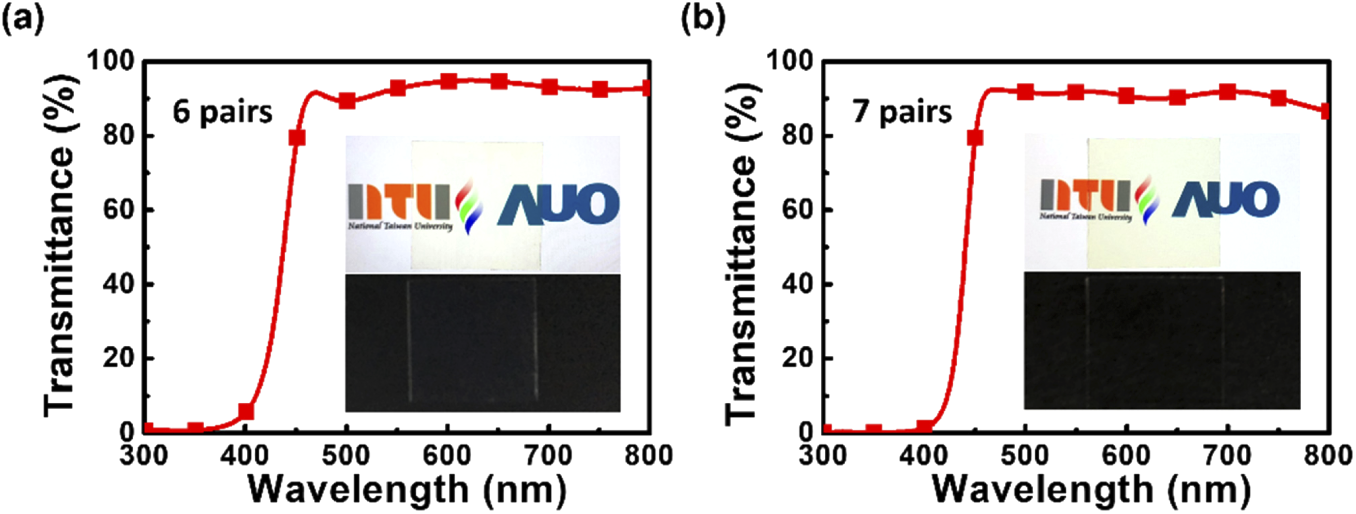

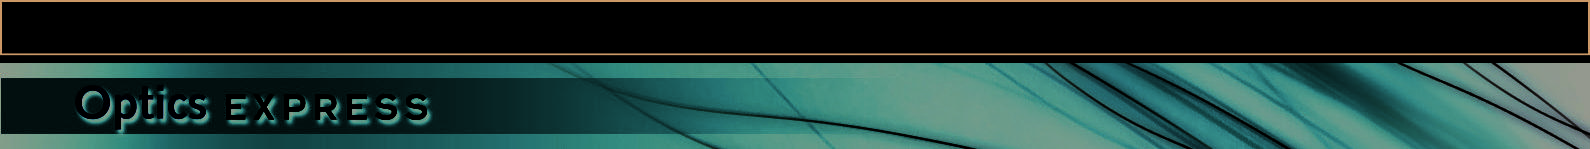

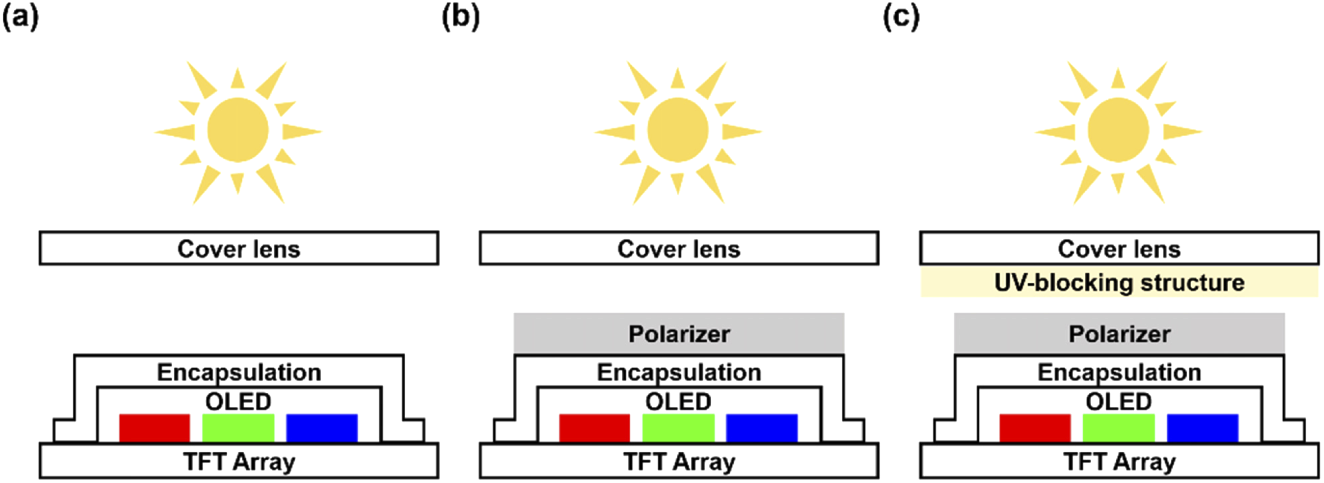

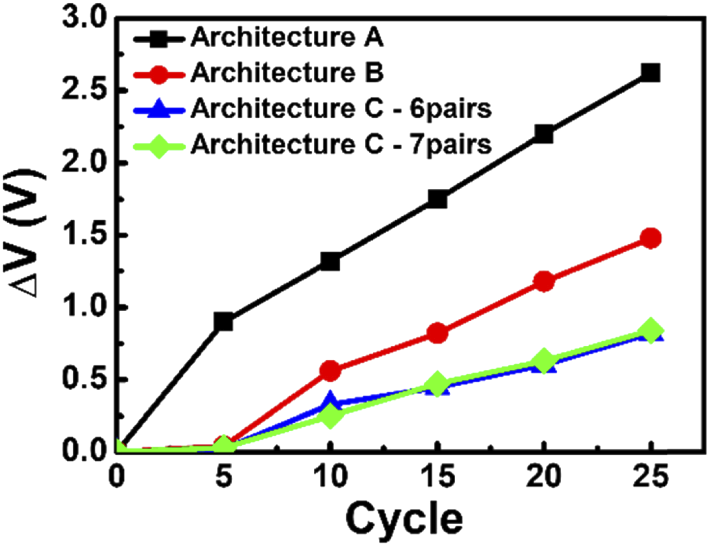

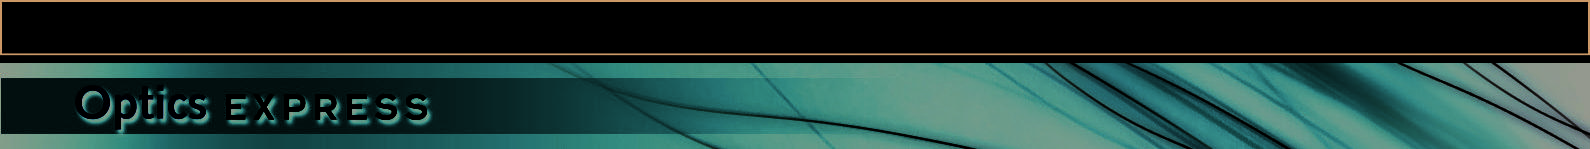

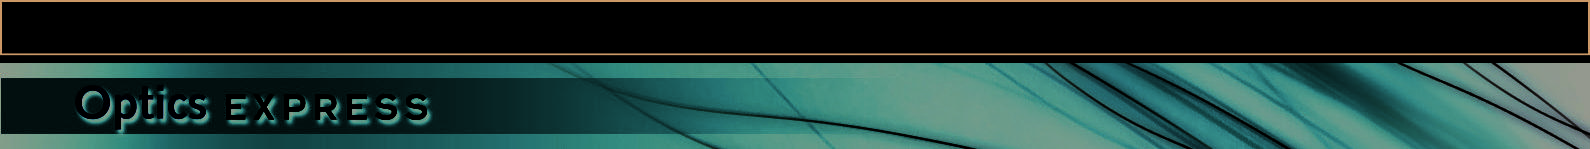

In [7]:
images = extract_images_from_pdf(pdf_filepath, pdf_filename)
display_images(images)